In [4]:
# データセットのインポート
# -> ボストンの住宅価格分析と予測
from sklearn import datasets
boston = datasets.load_boston()

In [2]:
# データセットの概要表示
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [3]:
import pandas as pd
X_df = pd.DataFrame(boston.data)
X_df.columns = boston.feature_names
X_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [6]:
y = boston.target
print(y[0:5])

[24.  21.6 34.7 33.4 36.2]


In [7]:
# CRIM：犯罪率
# ZN：住宅区画の割合
# INDUS：商業区画の割合
# CHAS：チャールズ川の周辺地域かどうか（1：周辺、0：それ以外）
# NOX：NOxの濃度
# RM：部屋数
# AGE：1940年以前に建てられた建物の割合
# DIS：5つのボストン市内の雇用施設からどのくらいの距離があるか
# RAD：環状高速道路へのアクセスのしやすさ
# TAX：1万ドルあたりの不動産税率
# PTRATIO：児童と教師の比率
# B：黒人住民の比率
# LSTAT：低所得層の割合

In [8]:
# 単回帰
# -> y = aX + b の関数式モデル　※説明関数(単回帰のX)が複数種類ある場合は「重回帰」という　（ビットコイン予測も単回帰）
import numpy as np
X = np.array(X_df.loc[:, ["RM"]])

In [9]:
# データの前処理
# -> データの欠損値、説明関数が１つなのでスケーリング処理不要なので前処理はスキップ

In [15]:
# データを訓練データとテストデータに分ける
# -> 今回はランダムに分ける
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size = 0.2)

In [16]:
# モデルを使って学習
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [17]:
# 期待する性能が出たか評価
y_pred = model.predict(X_test)

print("予測値")
print(y_pred)
print("実際値")
print(y_test)

予測値
[20.09701196 18.83978021 17.83207537 22.53469795 22.69785017 23.1873068
 23.80152689 24.53091325 17.29463279 14.06038012 18.65743362 21.92047786
 18.66703081 26.89182173 38.3700597  23.52320842 26.90141892 20.99914772
 13.23502187 26.88222454 29.20474427 21.58457625 30.53875353 18.11999104
 21.69014533  2.04469957 21.47900717 21.94926943 17.08349464 19.29084809
 16.23894201 34.02253311 42.34329592 27.18933459 17.16027215 31.7767909
  9.96238044 18.71501676 26.07606067 18.54226736 28.11066473 18.80139146
 37.38154924 19.895471   14.29071266 28.30260851 22.21799072 18.70541957
 23.73434657 20.13540072 24.09903975 17.10268901 29.74218685 23.52320842
 23.90709597 21.78611722 17.1122862  32.14148408 19.35802842 24.07984537
 27.11255708 14.67460021 27.10295989 41.47954892 18.9357521  13.61890943
 20.17378948 23.04334897 46.59485062 19.58836095 21.38303528 20.79760676
 22.11242164 29.04159206 22.30436542 23.91669316 21.06632805 29.64621496
 15.41358376 20.05862321 37.69825648 16.96832837 

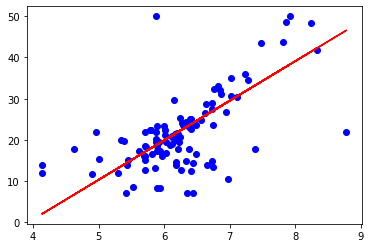

In [18]:
# 結果比較としてグラフ作成
# -> 予測値は直線(plot)、実際値は散布図(scatter)で表現
#  ->直線（予測値）に点（実際値）の数が多いほど精度が高い
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(X_test, y_test, color = "blue")
plt.plot(X_test, y_pred, color = "red")